In [2]:
import numpy as np
import librosa
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os

In [3]:
file_path_t = f'/home/data/data_OLKAVS/deepfake/training_meta.csv'
file_path_v = f'/home/data/data_OLKAVS/deepfake/validation_meta.csv'
# CSV 파일 읽기, 헤더가 없음을 명시
data_t = pd.read_csv(file_path_t)
data_v = pd.read_csv(file_path_v)
data = pd.concat([data_t, data_v], axis=0)

print(f"Total data: {data.shape[0]}")

# 상위 5개 행을 인덱스 없이 출력
print('\nTrain dataset')
top_5_rows = data_t.head().to_string(index=False,header=True)
print(top_5_rows)

print('\nValidation dataset')
top_5_rows = data_v.head().to_string(index=False,header=True)
print(top_5_rows)



Total data: 55512

Train dataset
                        영상ID                 UUID 인물성별 촬영장소       촬영시작                      스크립트파일  시나리오번호
c9f5c37976afa879c834_001.mp4 c9f5c37976afa879c834   여성   EQ 2020-08-03 speaker_001_footage_004.txt     NaN
c9f5c37976afa879c834_002.mp4 c9f5c37976afa879c834   여성   EQ 2020-08-03 speaker_001_footage_005.txt     NaN
c9f5c37976afa879c834_003.mp4 c9f5c37976afa879c834   여성   EQ 2020-08-03 speaker_001_footage_006.txt     NaN
c9f5c37976afa879c834_004.mp4 c9f5c37976afa879c834   여성   EQ 2020-08-03 speaker_001_footage_007.txt     NaN
c9f5c37976afa879c834_005.mp4 c9f5c37976afa879c834   여성   EQ 2020-08-03 speaker_001_footage_008.txt     NaN

Validation dataset
                        영상ID                 UUID 인물성별 촬영장소       촬영시작                      스크립트파일  시나리오번호
4ed3e16b119ac4685914_001.mp4 4ed3e16b119ac4685914   남성   EQ 2020-08-15 speaker_014_footage_001.txt     NaN
4ed3e16b119ac4685914_002.mp4 4ed3e16b119ac4685914   남성   EQ 2020-08-15 speaker_014_footage_

### 전체 인원수

In [4]:
data.drop_duplicates(subset='UUID', keep='first', inplace=True)

print(data.shape[0])

360


### 성비

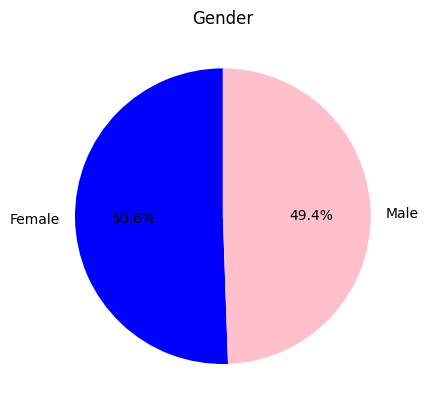

인물성별
Female    182
Male      178
Name: count, dtype: int64


In [5]:
# 'F'와 'M'의 개수 카운트
count_fm = data['인물성별'].value_counts()
# 인덱스 이름 변경 ('F' -> 'Female', 'M' -> 'Male')
count_fm.index = count_fm.index.map({'남성': 'Male','여성': 'Female'})

# 원 그래프 생성
plt.pie(count_fm, labels=count_fm.index, autopct='%1.1f%%', colors=['blue', 'pink'], startangle=90)

plt.title('Gender')  # 그래프 제목
plt.show()

print(count_fm)

### 촬영장소

Index(['코지모임공간', '서울대입구역 사무실', '크라우드웍스 사무실', 'EQ'], dtype='object', name='촬영장소')


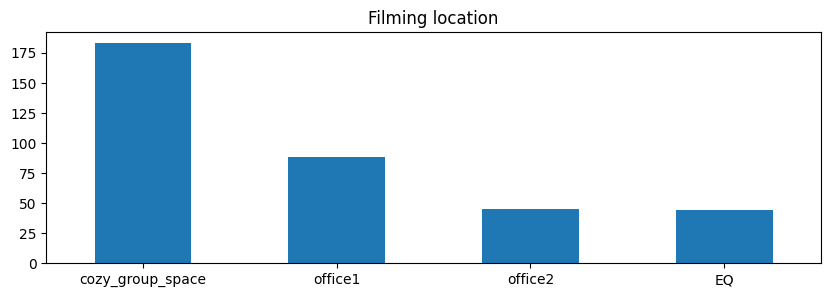

In [9]:
# Nationality 열의 각 값이 몇 번 나타나는지 카운트
count_fm = data['촬영장소'].value_counts()

values = {'코지모임공간':'cozy_group_space', '서울대입구역 사무실' : 'office1', '크라우드웍스 사무실':'office2', 'EQ': 'EQ'}

# 고유한 값들을 확인
unique_nationalities = count_fm.index
print(unique_nationalities)
# 바 그래프 생성
count_fm.index = count_fm.index.map(values)
count_fm.plot(kind='bar',figsize=(10,3))
plt.xticks(rotation=0)
plt.xlabel(None)
plt.title('Filming location')
plt.show()